## [당뇨병 데이터로 5가지의 머신러닝 알고리즘(SVM, LR, RF, DT, KNN)을 이용하여 분류]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

### 1. csv 파일 불러오기

In [2]:
df = pd.read_csv("diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


### 2. 데이터 확인

In [3]:
# 컬럼명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Text(0.5, 1.0, 'Label')

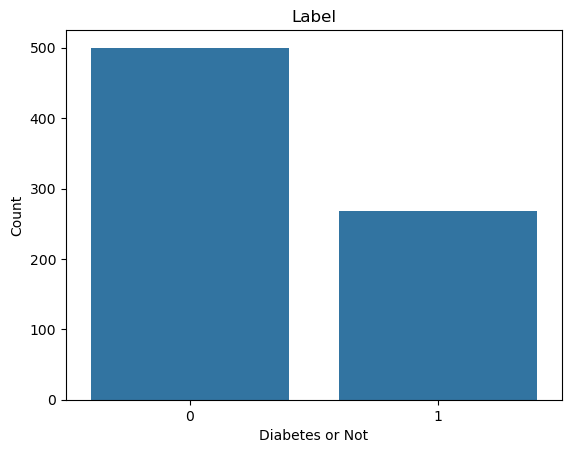

In [4]:
# label 개수 확인 (그래프)
sns.countplot(data=df, x="Outcome")
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Label")

In [5]:
# label 개수 확인
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
# 결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\lej55\AppData\Local\Temp\ipykernel_8408\2551426308.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


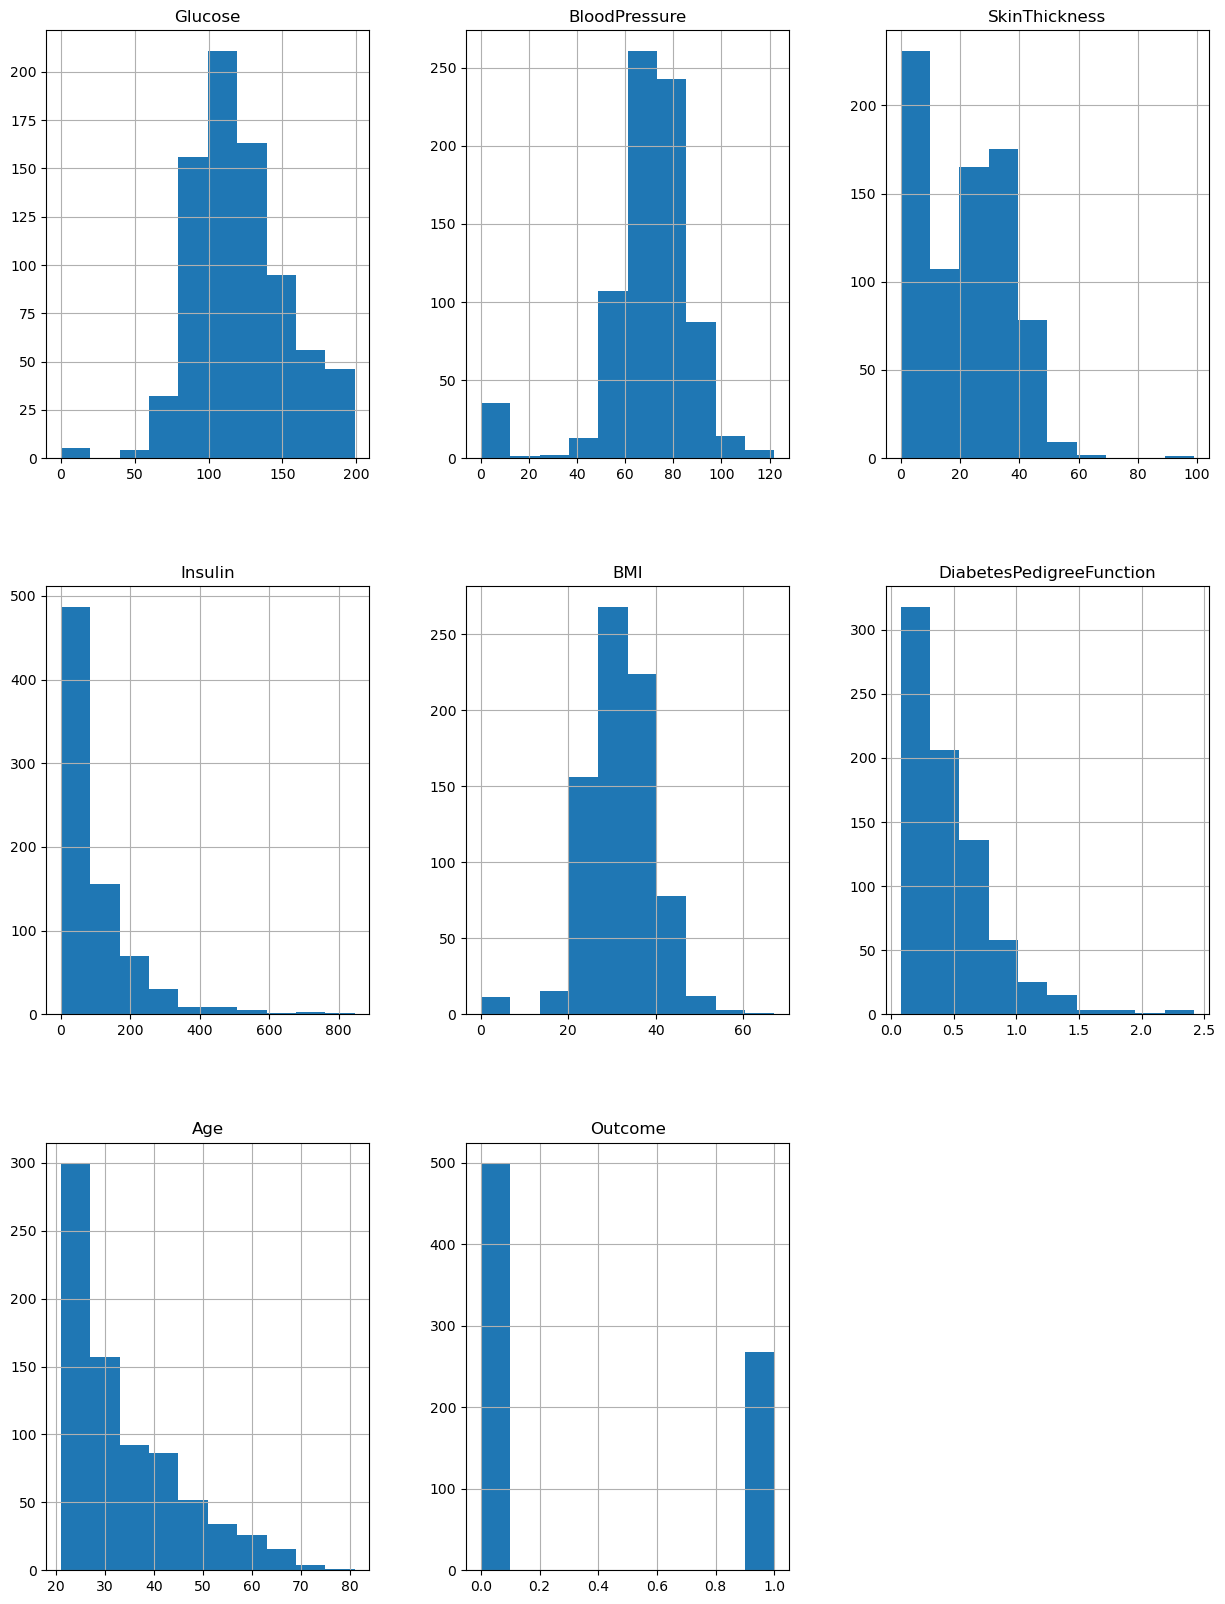

In [7]:
# 각 컬럼별 히스토그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

### 3. data/label 나누기 & train/test dataset 나누기

In [8]:
X = df.drop('Outcome', axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [9]:
y = df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. 모델 생성/학습/예측 및 평가

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### - 4.1 SVM

In [12]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n---SVM Classifier---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


---SVM Classifier---
0.7662337662337663
[[87 12]
 [24 31]]


#### - 4.2 LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=42)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print("\n---Logistic Regression Classifier---")
print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))


---Logistic Regression Classifier---
0.7662337662337663
[[82 17]
 [19 36]]


### - 4.3 RandomForest

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)

pred_rf = clf_rf.predict(X_test)

print("\n---Random Forest Classifier---")
print("Accuracy:", accuracy_score(y_test, pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_rf))


---Random Forest Classifier---
Accuracy: 0.7597402597402597
Confusion Matrix:
 [[79 20]
 [17 38]]


### - 4.4 DecisionTree

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print("\n---Decision Tree Classifier---")
print("Accuracy:", accuracy_score(y_test, pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dt))


---Decision Tree Classifier---
Accuracy: 0.7402597402597403
Confusion Matrix:
 [[75 24]
 [16 39]]


### - 4.5 KNeighbors

In [16]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

pred_knn = clf_knn.predict(X_test)

print("\n---K-Nearest Neighbors Classifier---")
print("Accuracy:", accuracy_score(y_test, pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_knn))


---K-Nearest Neighbors Classifier---
Accuracy: 0.6818181818181818
Confusion Matrix:
 [[73 26]
 [23 32]]
